In [2]:
# 整理数据的库
import numpy as np
import pandas as pd
# 数据可视化的库
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
# 数据分析的库
from scipy import stats
import scipy.stats as stats
import statsmodels.formula.api as smf # 回归分析
from scipy.stats import chi2_contingency #卡方检验
import pingouin as pg
# 其它
import warnings
warnings.filterwarnings('ignore') #忽视警告


In [6]:
# 读取数据
df = pd.read_excel("./data/inm.xlsx")

# 数据清洗

In [7]:
# 定义函数方法:将数字和数字和代表含义一一映射

# high_school_major变量：1为文科，2为理科
def high_school_major(series):
    if series == 1:
        return '文科'
    else:
        return '理科'

# gender变量：1为男性，2为女性
def gender(series):
    if series == 1:
        return '男性'
    else:
        return '女性'
# hukou变量：1为城镇，2为非城镇
def hukou(series):
    if series == 1:
        return '城镇'
    else:
        return '非城镇'
# location变量：1为广东地区，2为珠三角地区，3为粤东，4为粤西，5为粤北
def location (series):
    if series == 1:
        return "非广东地区"
    elif series == 2:
        return "珠三角地区"
    elif series == 3:
        return "粤东"
    elif series == 4:
        return "粤西"
    else:
        return "粤北"
# like变量：1为喜欢，0为不喜欢
def like(series):
    if series == 1:
        return '喜欢'
    else:
        return '不喜欢'
# impr变量：1为有提升空间，0为挺好的
def impr(series):
    if series == 1:
        return '有提升空间'
    else:
        return '挺好的'


In [8]:
# 将high_school_major，gender,hukou,location变量转为“类别型变量”
df.high_school_major = df.high_school_major.apply(high_school_major).astype('category')
df.gender = df.gender.apply(gender).astype('category')
df.hukou = df.hukou.apply(hukou).astype('category')
df.location = df.location.apply(location).astype('category')

In [9]:
# 看一下每一个变量对应的是第几个变量（变量名前的数字为其顺序）
for i in range(len(df.columns)):
    print(i,df.columns[i])

0 method
1 l_code
2 l_design
3 l_operation
4 l_production
5 l_copywriter
6 l_market
7 l_other
8 l_non
9 maj_work
10 maj_dir
11 cap_code
12 cap_design
13 cap_operation
14 cap_production
15 cap_copywriter
16 cap_market
17 ranking
18 effort_read
19 effort_info
20 effort_res
21 effort_project
22 effort_overall
23 sati_code
24 sati_design
25 sati_operation
26 sati_production
27 sati_copywriter
28 sati_market
29 sati_other
30 impr_code
31 impr_design
32 impr_operation
33 impr_production
34 impr_copywriter
35 impr_market
36 impr_other
37 sati_overall
38 grade
39 gender
40 spending
41 high_school_major
42 location
43 hukou


In [14]:
# 将以“l_”开头的变量（第1~9列的变量）转为“类别型变量”
for i in range(1,9):
    df.iloc[:,i] = df.iloc[:,i].apply(like).astype('category')

In [10]:
# 检查一下结果
df.filter(regex = "^l_.*")

,l_code,l_design,l_operation,l_production,l_copywriter,l_market,l_other,l_non
0,0,1,1,1,1,0,0,0
1,1,0,1,1,0,0,0,0
2,0,1,1,1,1,0,0,0
3,0,0,1,1,1,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,0,0,0
76,0,0,1,1,0,0,0,0
77,1,1,1,1,0,0,0,0
78,0,1,1,1,1,1,0,0


In [11]:
# 将以“impr_”开头的变量（第30~37列的变量）转成“类别型变量”
for i in range(30,37):
    df.iloc[:,i] = df.iloc[:,i].apply(impr).astype('category')

In [12]:
# 检查一下结果
df.filter(regex = "^impr_.*")

,impr_code,impr_design,impr_operation,impr_production,impr_copywriter,impr_market,impr_other
0,挺好的,有提升空间,有提升空间,有提升空间,有提升空间,有提升空间,挺好的
1,有提升空间,有提升空间,挺好的,挺好的,有提升空间,有提升空间,挺好的
2,挺好的,有提升空间,有提升空间,有提升空间,有提升空间,挺好的,挺好的
3,挺好的,挺好的,有提升空间,有提升空间,有提升空间,挺好的,挺好的
4,挺好的,有提升空间,挺好的,挺好的,有提升空间,挺好的,挺好的
...,...,...,...,...,...,...,...
75,有提升空间,挺好的,挺好的,有提升空间,挺好的,有提升空间,挺好的
76,挺好的,有提升空间,有提升空间,挺好的,挺好的,有提升空间,挺好的
77,有提升空间,挺好的,有提升空间,有提升空间,挺好的,有提升空间,挺好的
78,挺好的,有提升空间,挺好的,挺好的,挺好的,有提升空间,挺好的


# 数据分析

## ✨探索数据（描述性统计）

In [13]:
# 返回所有变量的描述性统计结果（注意——这里的描述性统计结果仅适用于“数值型变量”）
df.describe()

,method,l_code,l_design,l_operation,l_production,l_copywriter,l_market,l_other,l_non,maj_work,...,sati_code,sati_design,sati_operation,sati_production,sati_copywriter,sati_market,sati_other,sati_overall,grade,spending
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,1.47500,0.162500,0.775000,0.625000,0.725000,0.525000,0.425000,0.062500,0.02500,3.300000,...,2.900000,3.487500,3.462500,3.662500,3.575000,3.275000,3.275000,3.412500,3.000000,3.350000
std,1.04306,0.371236,0.420217,0.487177,0.449331,0.502525,0.497462,0.243589,0.15711,0.919549,...,0.962591,0.693437,0.810434,0.825906,0.689432,0.655551,0.635948,0.923583,0.159111,0.982119
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,6.000000


In [14]:
# 返回单个变量的描述性统计结果
df["effort_overall"].describe()


count    80.000000
mean      3.175000
std       0.707554
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: effort_overall, dtype: float64

<AxesSubplot:xlabel='effort_overall', ylabel='Density'>

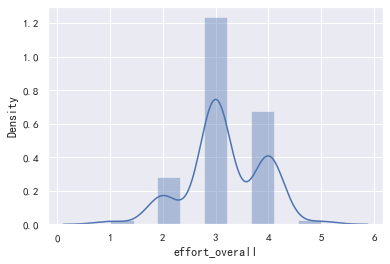

In [16]:
# 直方图
sns.distplot(a = df["effort_overall"])

In [ ]:
# 类别型变量的描述性统计结果
df.gender.value_counts()


女性    64
男性    16
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

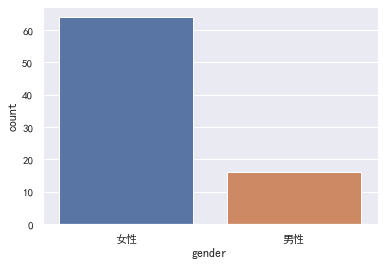

In [ ]:
# 条形图
sns.countplot(x="gender", data=df)

In [ ]:
# 饼状图
table_location = df.location.value_counts()#将生源地变量整理成表格
table_location


珠三角地区    40
粤东       17
粤西       10
非广东地区     7
粤北        6
Name: location, dtype: int64

<AxesSubplot:ylabel='location'>

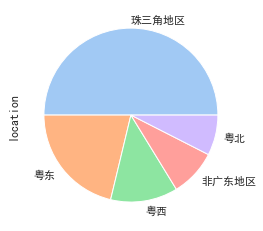

In [ ]:
colors = sns.color_palette('pastel')[0:5] #使用seaborn的调色板

table_location.plot.pie(colors = colors)#用matplotlib画图

## 🎉推断性统计

### 1、独立样本t检验

比较“城镇户口”和“非城镇户口”的同学学习成绩是否有差异【分析“huku”（“户口类型”）和“ranking”（“学习成绩”）的关系】

In [ ]:
# “城镇户口”和“非城镇户口”的同学学习成绩描述
df.groupby('hukou').ranking.mean()

hukou
城镇     3.40
非城镇    2.92
Name: ranking, dtype: float64

In [ ]:
# 独立样本t检验结果（检验统计量t值，p值）
stats.ttest_ind(df['ranking'][df['hukou'] == "城镇"],
               df['ranking'][df['hukou'] == "非城镇"])   

Ttest_indResult(statistic=2.413198999619531, pvalue=0.018159322230973312)

<AxesSubplot:xlabel='hukou', ylabel='ranking'>

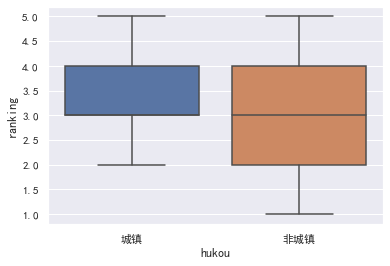

In [ ]:
## 独立样本t检验结果可视化
sns.boxplot(x = 'hukou', y = 'ranking', data = df) 

**结果解读：**
城镇户口同学和非城镇户口同学的学习成绩分别是3.40和2.92.独立样本t检验显示城镇户口同学和非城镇户口同学学习成绩有显著差异(t=2.41,p=0.02 < 0.05)。

### 2、单因素方差分析

比较不同生源地（非广东地区/珠三角地区/粤东/粤西/粤北）的同学对学院课程的满意度是否有差异【分析“location”（“生源地”）和“sati_overall”（“学院课程”）的关系】

In [49]:
df.groupby('location').sati_overall.mean()

location
珠三角地区    3.450000
粤东       3.529412
粤北       3.166667
粤西       3.300000
非广东地区    3.285714
Name: sati_overall, dtype: float64

In [68]:
# 单因素方差分析
aov = pg.anova(data=df, dv='sati_overall', between='location', detailed=True)
print(aov)


     Source         SS  DF        MS         F     p-unc       np2
0  location   0.890301   4  0.222575  0.251035  0.908173  0.013212
1    Within  66.497199  75  0.886629       NaN       NaN       NaN


In [23]:
#事后检验
posthoc = pg.pairwise_ttests(data=df, dv='sati_overall', between='location')
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast    A           B           Paired    Parametric         T     dof  alternative      p-unc    BF10    hedges
----------  ----------  ----------  --------  ------------  ------  ------  -------------  -------  ------  --------
location    粤西        珠三角地区  False     True          -0.372  13.030  two-sided        0.716   0.354    -0.137
location    粤西        粤东        False     True          -0.592  11.122  two-sided        0.565   0.417    -0.275
location    粤西        非广东地区  False     True           0.035  12.892  two-sided        0.973   0.424     0.014
location    粤西        粤北        False     True           0.245  12.133  two-sided        0.810   0.445     0.115
location    珠三角地区  粤东        False     True          -0.380  53.886  two-sided        0.706   0.305    -0.084
location    珠三角地区  非广东地区  False     True           0.659  18.126  two-sided        0.518   0.437     0.161
location    珠三角地区  粤北        False     True           0.651   6.872  two-sided        

<AxesSubplot:xlabel='location', ylabel='sati_overall'>

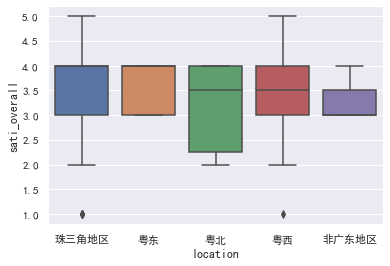

In [51]:
# 单因素方差分析结果可视化
sns.boxplot(x = 'location', y = 'sati_overall', data = df) 

**结果解读：**
非广东地区/珠三角地区/粤东/粤西/粤北等地的同学对学院专业的满意度分别是3.45,3.52,3.16,3.30,3.29；单因素分析结果显示不同生源地的同学对学院课程满意度没有显著差异(F = 0.25, p = 0.91 > 0.05)。

### 3、卡方检验

分析“gender”(性别)和“high_school_major”(高中选科)的关系

In [52]:
# 列联表
crosstab = pd.crosstab(df.gender,df.high_school_major)
crosstab


high_school_major,文科,理科
gender,,
女性,37,27
男性,8,8


In [53]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab) 


In [58]:
#卡方值
stat

0.07936507936507936

In [59]:
# p值
print("p = " + str(p))

p = 0.7781596861761658


<AxesSubplot:xlabel='gender', ylabel='count'>

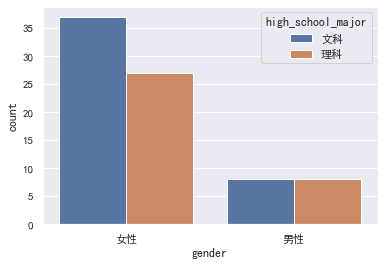

In [56]:
# 卡方检验结果可视化
sns.countplot(x = 'gender', hue = 'high_school_major', data = df) 

**结果解读：**
卡方检验的结果显示“性别”与“高中选科”没有联系（chisq=0.79,p=0.78 >0.05）。

### 4、相关分析

In [61]:
# 努力方式与排名的相关关系
pg.pairwise_corr(df, columns=["effort_overall","ranking"], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,effort_overall,ranking,pearson,two-sided,80,0.28433,"[0.07, 0.47]",0.010585,3.454,0.732312


<AxesSubplot:xlabel='effort_overall', ylabel='ranking'>

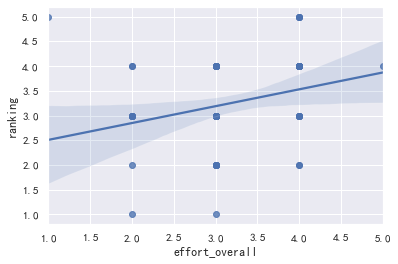

In [38]:
# 散点图（两变量）（包含拟合直线）
sns.regplot(x = "effort_overall", y = "ranking", data = df)

**结果解读：**
相关分析的结果显示“总体努力程度”与“学习成绩”显著相关（r=0.28,p=0.01 < 0.05）。

In [60]:
# 多个变量的相关分析
df[[ "effort_read","effort_info","effort_res","effort_project","effort_overall"]].rcorr()

,effort_read,effort_info,effort_res,effort_project,effort_overall
effort_read,-,***,***,*,*
effort_info,0.467,-,***,***,*
effort_res,0.419,0.642,-,***,**
effort_project,0.248,0.469,0.373,-,**
effort_overall,0.24,0.253,0.324,0.328,-


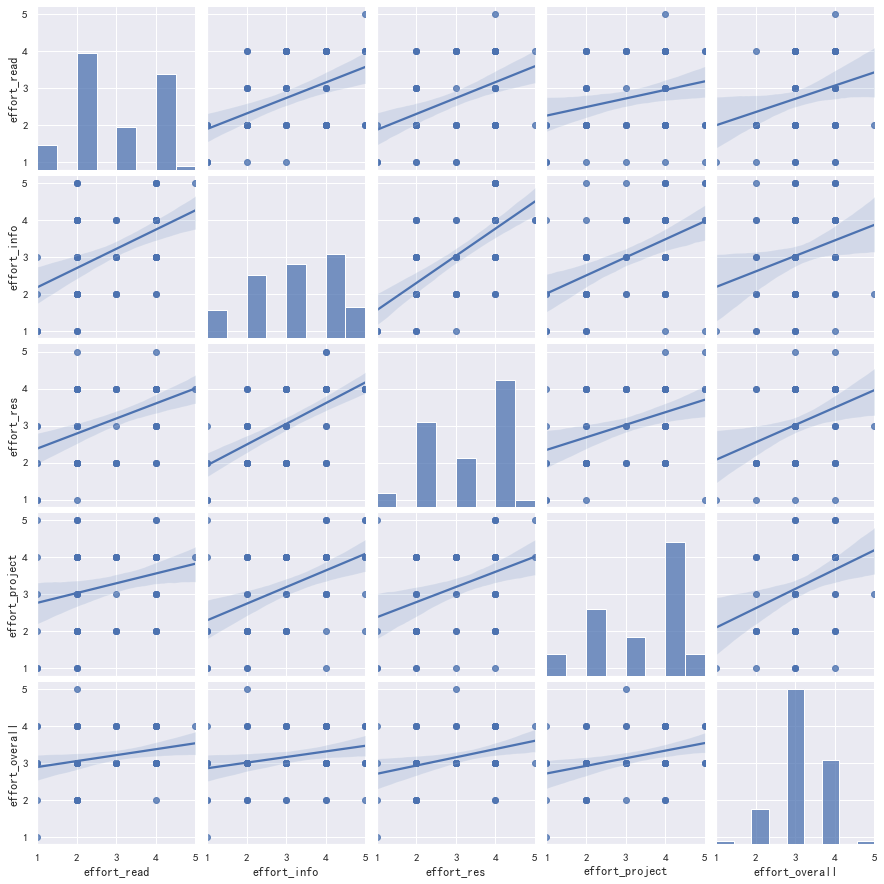

In [13]:
# 筛选多个变量画出散点图（含回归直线）“矩阵”
sns.pairplot(df[["effort_read","effort_info","effort_res","effort_project","effort_overall"]], kind="reg")

### 5、回归分析

以"ranking"（学习成绩）为因变量，"maj_work"，“maj_dir”，“effort_overall”为自变量建立回归模型

In [41]:
model = smf.ols("ranking ~ maj_work + maj_dir + effort_overall",
        data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ranking   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     5.197
Date:                Mon, 20 Dec 2021   Prob (F-statistic):            0.00256
Time:                        23:45:39   Log-Likelihood:                -92.492
No. Observations:                  80   AIC:                             193.0
Df Residuals:                      76   BIC:                             202.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7129      0.536      3.195      0.002       0.645       2.781
maj_work          -0.0797      0.098     -0.814      0.418      -0.275       0.115
maj_dir            0.2179      0.079      2.751      0.007       0.060       0.376
effort_overall     0.3679      0.127      2.888      0.005       0.114       0.622
==============================================================================
Omnibus:                        0.771   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.326
Skew:                          -0.107   Prob(JB):                        0.850
Kurtosis:                       3.228   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**结果解读：**

回归方程为： ranking = 1.71 - 0.08(mai_work) + 0.02(maj_dir) + 0.37(effort_overall)。F检验的结果显示回归模型具有统计学意义(F = 5.20， p = 0.00256 < 0.05)；R方为0.17,这意味着三个自变量能解释因变量17%的变异；t检验的结果显示maj_dir(t = 2.75,p =0.007 < 0.05)和effort_overall(t = 2.89,p =0.005 < 0.05)两个变量都能显著影响ranking。

### 6、信度分析

In [42]:
df_effort = df.filter(regex = "^effort_.*")#以正则表达式的办法筛选以"effort_"开头的变量

In [42]:
pg.cronbach_alpha(data=df_effort) #返回Cronbach's α值及其置信区间

(0.753786045633211, array([0.657, 0.83 ]))